In [1]:
import cveig
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
import pandas as pd
from scipy import stats
import networkx as nx

In [2]:
adj_matrix_point = pd.read_table('../../masters_r/samples/graph_point_60_1.table', sep=' ').to_numpy()
adj_matrix_exp = pd.read_table('../../masters_r/samples/graph_exp_60_1.table', sep=' ').to_numpy()
adj_matrix_pareto = pd.read_table('../../masters_r/samples/graph_pareto_60_1.table', sep=' ').to_numpy()

In [3]:
G_point = nx.from_numpy_array(adj_matrix_point)
G_exp = nx.from_numpy_array(adj_matrix_exp)
G_pareto = nx.from_numpy_array(adj_matrix_pareto)

Text(0, 0.5, 'Frequency')

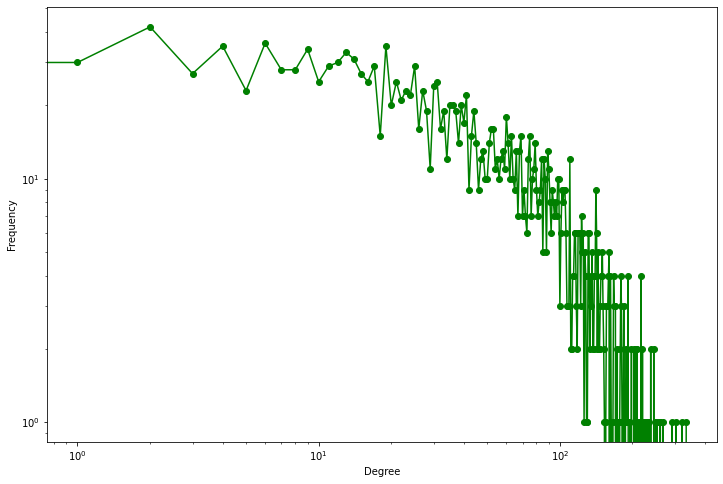

In [4]:
degree_freq = nx.degree_histogram(G_exp)
degrees = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees, degree_freq,'go-') 
plt.xlabel('Degree')
plt.ylabel('Frequency')

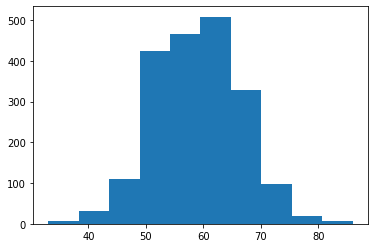

In [5]:
def plot_degree_dist1(G, log=False, title=None):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    if log:
        plt.yscale('log')
        plt.xscale('log')
        plt.xlabel('Node degree')
        plt.ylabel('count')
        plt.title(title)
    plt.show()

plot_degree_dist1(G_point, title='Point mass distribution theta')

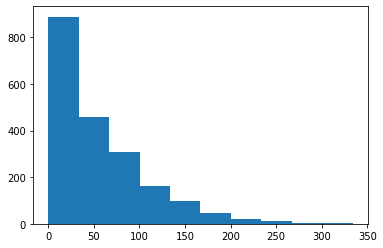

In [6]:
plot_degree_dist1(G_exp, title='Exponential distribution theta')

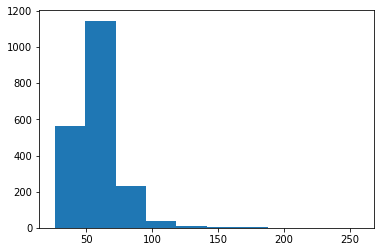

In [7]:
plot_degree_dist1(G_pareto, title='Pareto distribution theta')

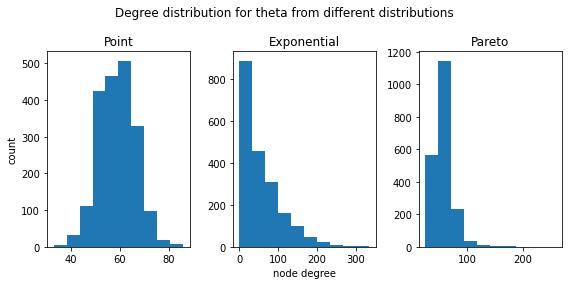

In [45]:
fig, ax = plt.subplots(1,3, figsize=(8,4))
fig.suptitle('Degree distribution for theta from different distributions')

degrees_point = [G_point.degree(n) for n in G_point.nodes()]
ax[0].hist(degrees_point)
ax[0].set_title('Point')
ax[0].set_ylabel('count')

degrees_exp = [G_exp.degree(n) for n in G_exp.nodes()]
ax[1].hist(degrees_exp)
ax[1].set_title('Exponential')
ax[1].set_xlabel('node degree')

degrees_pareto = [G_pareto.degree(n) for n in G_pareto.nodes()]
ax[2].hist(degrees_pareto)
ax[2].set_title('Pareto')
fig.tight_layout()
fig.savefig('dcsbm_hist.png')


In [32]:
def plot_degree_dist(G, log_scale=True, log_binning=True, num_bins=20, do_show=True, start=1):
    fig = plt.figure()
    fig.suptitle('Degree distribution')
    ax = fig.add_subplot()
    if log_scale:
        ax.set_yscale('log')
        ax.set_xscale('log')
    degrees = [G.degree(n) for n in G.nodes()]
    if log_binning:
        #if min(degrees) == 0:
        #    start = 0
        #else:
        #    start = np.log10(min(degrees))
        bins = np.logspace(start=start, stop=np.log10(max(degrees)), num=num_bins)
    else:
        bins = np.linspace(start=min(degrees), stop=max(degrees), num=num_bins)
    n, bins, patches = plt.hist(degrees, bins)
    if do_show:
        plt.show()
        plt.suptitle('Degree distribution')
    return n, bins

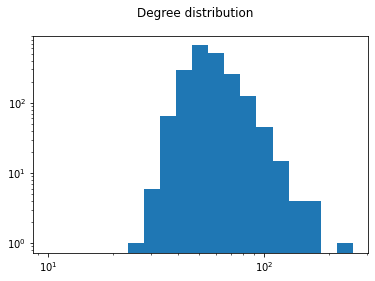

(array([  0.,   0.,   0.,   0.,   0.,   1.,   6.,  66., 297., 660., 516.,
        259., 125.,  46.,  15.,   4.,   4.,   0.,   1.]),
 array([ 10.        ,  11.8633408 ,  14.07388549,  16.69632998,
         19.80742526,  23.49822362,  27.87674349,  33.07113083,
         39.23340956,  46.54393082,  55.21665134,  65.50539524,
         77.71128278,  92.19154313, 109.36996947, 129.74932207,
        153.92604258, 182.60771006, 216.63374964, 257.        ]))

<Figure size 432x288 with 0 Axes>

In [33]:
plot_degree_dist(G_pareto)

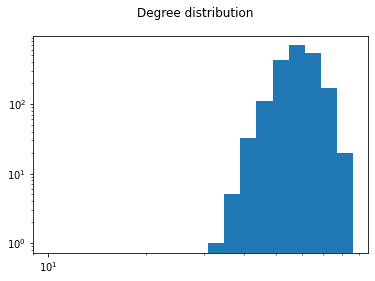

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          5.,  32., 111., 425., 695., 538., 172.,  20.]),
 array([10.        , 11.19912595, 12.54204221, 14.04599104, 15.73028228,
        17.61654125, 19.72898643, 22.09474039, 24.74417805, 27.71131666,
        31.03425256, 34.75565032, 38.92329055, 43.59068334, 48.8177553 ,
        54.67161903, 61.22743476, 68.56937536, 76.79170711, 86.        ]))

<Figure size 432x288 with 0 Axes>

In [34]:
plot_degree_dist(G_point)

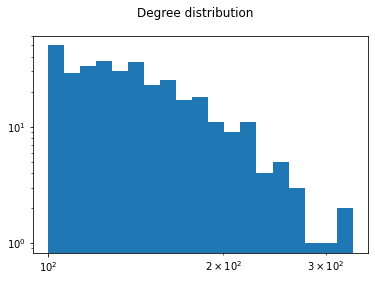

(array([50., 29., 33., 37., 30., 36., 23., 25., 17., 18., 11.,  9., 11.,
         4.,  5.,  3.,  1.,  1.,  2.]),
 array([100.        , 106.5529808 , 113.53537717, 120.97532863,
        128.90281869, 137.34979564, 146.35030137, 155.94060852,
        166.15936665, 177.04775804, 188.64966363, 201.01183986,
        214.18410712, 228.21955053, 243.17473385, 259.10992747,
        276.08935126, 294.18143343, 313.45908627, 334.        ]))

<Figure size 432x288 with 0 Axes>

In [35]:
plot_degree_dist(G_exp, start=2)